## Setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Set font style as monospace globally
plt.rcParams['font.family'] = 'monospace'

# Set font size 10 globally
plt.rcParams['font.size'] = 10

import utils_11 as utils

%load_ext autoreload
%autoreload 2

## EXERCISE 43 ■ Cities

In [2]:
filename = "data/cities.json"
cities = pd.read_json(filename)
cities.shape

FileNotFoundError: File data/cities.json does not exist

In [ ]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


### 01 Create a bar plot showing how many of the top 1,000 cities are in each state

In [ ]:
# Create a bar plot showing how many of the top 1,000 cities are in each state.
# There should be one vertical bar per state (with a few extra for nonstates such as
# Washington, DC). The plot should be ordered such that the state with the fewest
# cities in this list is on the left and the state with the most cities is on the right.

In [ ]:
# Count number of cities per state and sort
cities_count = cities['state'].value_counts().sort_values()

# Filter states with at least 10 cities
cities_count = cities_count[cities_count >= 20]
cities_count

state
Wisconsin          20
Colorado           21
Indiana            21
New Jersey         22
North Carolina     22
Minnesota          24
Arizona            25
Washington         28
Michigan           31
Ohio               33
Massachusetts      36
Illinois           52
Florida            73
Texas              83
California        212
Name: count, dtype: int64

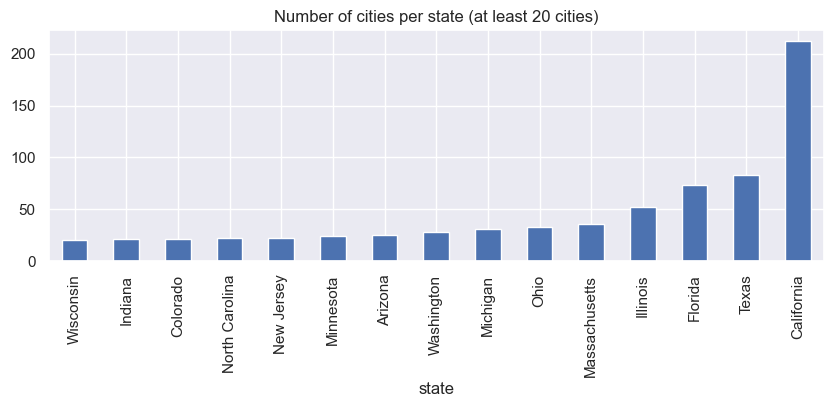

In [ ]:
# Plot the result
title = 'Number of cities per state (at least 20 cities)'
cities_count.plot(kind='bar', figsize=(10, 3), title=title);

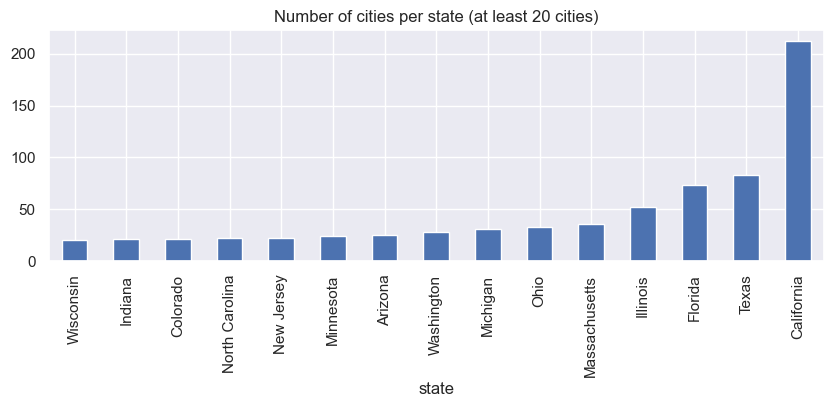

In [ ]:
# The same result using groupby and size
cities_count = cities.groupby('state').size().sort_values()

# Filter states with at least 20 cities
cities_count = cities_count[cities_count >= 20]

# Plot the result
title = 'Number of cities per state (at least 20 cities)'
cities_count.plot.bar(figsize=(10, 3), title=title);

### 02 Create a bar plot comparing the growth of all cities in the state of Pennsylvania

In [ ]:
# Create a bar plot comparing the growth of all cities in the state of Pennsylvania.
# There should be one vertical bar per city, ordered with the slowest-growing city
# on the left and the fastest-growing city on the right.

In [ ]:
cities_pennsylvania = cities[cities['state'] == 'Pennsylvania'].copy()
cities_pennsylvania = cities_pennsylvania.sort_values(by='growth_from_2000_to_2013')
cities_pennsylvania

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
289,Erie,-2.8%,42.129224,-80.085059,100671,290,Pennsylvania
888,Wilkes-Barre,-4.3%,41.245915,-75.881307,41108,889,Pennsylvania
811,Altoona,-7.3%,40.518681,-78.394736,45796,812,Pennsylvania
61,Pittsburgh,-8.3%,40.440625,-79.995886,305841,62,Pennsylvania
437,Scranton,0.0%,41.408969,-75.662412,75806,438,Pennsylvania
758,Harrisburg,0.6%,40.273191,-76.886701,49188,759,Pennsylvania
223,Allentown,11.2%,40.608430,-75.490183,118577,224,Pennsylvania
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania
604,Lancaster,4.5%,40.037875,-76.305514,59325,605,Pennsylvania
443,Bethlehem,5.2%,40.625932,-75.370458,75018,444,Pennsylvania


In [ ]:
cities_pennsylvania.dtypes

city                         object
growth_from_2000_to_2013     object
latitude                    float64
longitude                   float64
population                    int64
rank                          int64
state                        object
dtype: object

In [ ]:
cities_pennsylvania['growth_from_2000_to_2013'] = (
    cities_pennsylvania['growth_from_2000_to_2013']
    .str.rstrip('%')  # Remove trailing '%'
    .astype(float)    # Convert to float
)

In [ ]:
cities_pennsylvania['growth_from_2000_to_2013'] /= 100  # Convert percentage to proportion  
cities_pennsylvania = cities_pennsylvania.sort_values(by='growth_from_2000_to_2013')
cities_pennsylvania

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
61,Pittsburgh,-0.083,40.440625,-79.995886,305841,62,Pennsylvania
811,Altoona,-0.073,40.518681,-78.394736,45796,812,Pennsylvania
888,Wilkes-Barre,-0.043,41.245915,-75.881307,41108,889,Pennsylvania
289,Erie,-0.028,42.129224,-80.085059,100671,290,Pennsylvania
437,Scranton,0.000,41.408969,-75.662412,75806,438,Pennsylvania
758,Harrisburg,0.006,40.273191,-76.886701,49188,759,Pennsylvania
4,Philadelphia,0.026,39.952584,-75.165222,1553165,5,Pennsylvania
604,Lancaster,0.045,40.037875,-76.305514,59325,605,Pennsylvania
443,Bethlehem,0.052,40.625932,-75.370458,75018,444,Pennsylvania
836,York,0.064,39.962598,-76.727745,43935,837,Pennsylvania


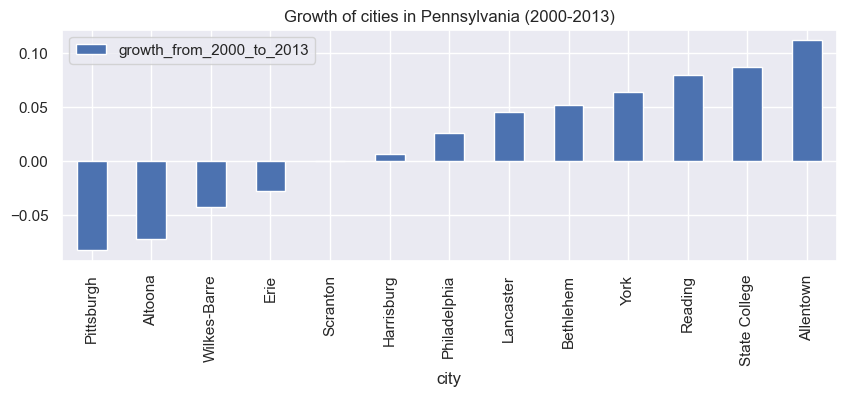

In [ ]:
title = 'Growth of cities in Pennsylvania (2000-2013)'
cities_pennsylvania.plot.bar(x='city', y='growth_from_2000_to_2013', figsize=(10, 3),title=title);

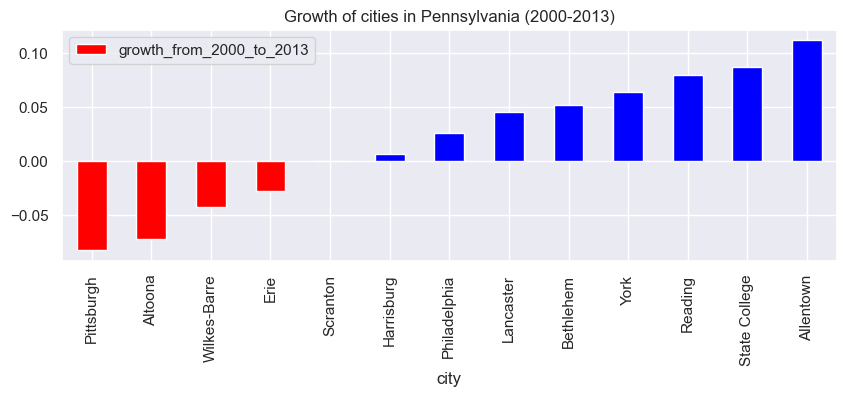

In [ ]:
# Define colors: red for negative, blue for non-negative
colors = ['red' if val < 0 else 'blue' for val in cities_pennsylvania['growth_from_2000_to_2013']]

# Plot with custom colors
title = 'Growth of cities in Pennsylvania (2000-2013)'
cities_pennsylvania.plot.bar(x='city', y='growth_from_2000_to_2013', figsize=(10, 3), title=title, color=colors);

### 03 Create a pie plot showing how much each Massachusetts city in the list contributes to the overall population

In [ ]:
# Create a pie plot showing how much each Massachusetts city in the list contrib-
# utes to the overall population. (And no, I’m not trying to say that 100% of the
# population of that state resides in large cities.) There should be one pie seg-
# ment per city in the list, and its size should indicate how much it contributes to
# the total.

In [ ]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


In [ ]:
cities_MA = cities[cities['state'] == 'Massachusetts'].copy()
cities_MA.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
23,Boston,9.4%,42.360082,-71.058880,645966,24,Massachusetts
128,Worcester,5.8%,42.262593,-71.802293,182544,129,Massachusetts
157,Springfield,1.1%,42.101483,-72.589811,153703,158,Massachusetts
256,Lowell,3.4%,42.633425,-71.316172,108861,257,Massachusetts
263,Cambridge,5.5%,42.373616,-71.109733,107289,264,Massachusetts


In [ ]:
# Compute total population for Massachusetts cities
total_pop = cities_MA['population'].sum()

# Add a new column for population share (as percentage)
cities_MA['population_share'] = (cities_MA['population'] / total_pop) * 100

# Sort by population share
cities_MA = cities_MA.sort_values(by='population_share', ascending=False)

# View the result
cities_MA[['city', 'population', 'population_share']].head()

,city,population,population_share
23,Boston,645966,21.481475
128,Worcester,182544,6.070466
157,Springfield,153703,5.111364
256,Lowell,108861,3.620152
263,Cambridge,107289,3.567875


In [ ]:
# Compute the total share of cities with share less than 3%
small_cities_share = cities_MA[cities_MA['population_share'] < 3]['population_share'].sum()
small_cities_share

# Filter cities with at least 3% share and add a row for 'Other'
cities_MA_filtered = cities_MA[cities_MA['population_share'] >= 3].copy()
other_row = pd.DataFrame({
    'city': ['Other'],
    'population': [cities_MA[cities_MA['population_share'] < 3]['population'].sum()],
    'population_share': [small_cities_share]
})
cities_MA_filtered = pd.concat([cities_MA_filtered, other_row], ignore_index=True)
cities_MA_filtered

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state,population_share
0,Boston,9.4%,42.360082,-71.058880,645966,24.0,Massachusetts,21.481475
1,Worcester,5.8%,42.262593,-71.802293,182544,129.0,Massachusetts,6.070466
2,Springfield,1.1%,42.101483,-72.589811,153703,158.0,Massachusetts,5.111364
3,Lowell,3.4%,42.633425,-71.316172,108861,257.0,Massachusetts,3.620152
4,Cambridge,5.5%,42.373616,-71.109733,107289,264.0,Massachusetts,3.567875
5,New Bedford,1.2%,41.636215,-70.934205,95078,315.0,Massachusetts,3.161801
6,Brockton,-0.3%,42.083433,-71.018379,94089,317.0,Massachusetts,3.128912
7,Quincy,5.8%,42.252877,-71.002270,93494,320.0,Massachusetts,3.109125
8,Lynn,2.6%,42.466763,-70.949494,91589,333.0,Massachusetts,3.045775
9,Other,NaN,NaN,NaN,1434471,NaN,NaN,47.703057


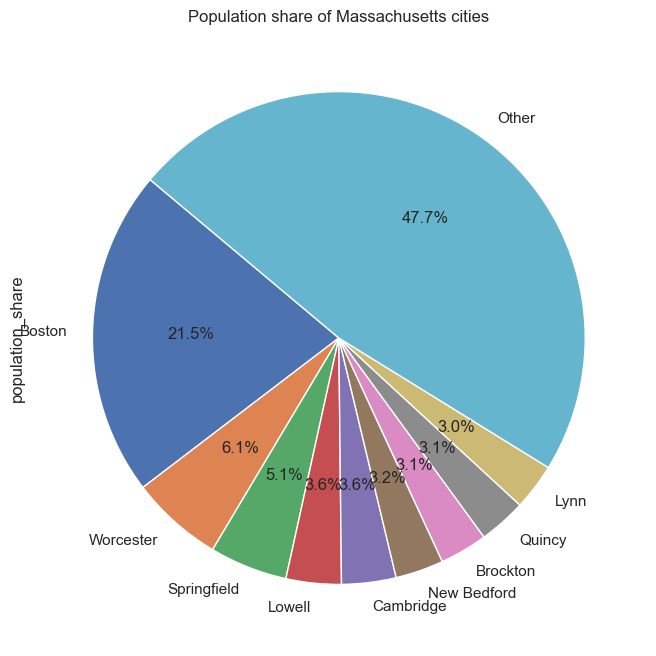

In [ ]:
# Plot a pie chart
title = 'Population share of Massachusetts cities'
cities_MA_filtered.set_index('city')['population_share'].plot.pie(
    figsize=(8, 8), title=title, autopct='%1.1f%%', startangle=140);

### 04 Create a scatter plot 

In [ ]:
# Create a scatter plot of the cities, putting the longitude on the x axis and lati-
# tude on the y axis. What does the resulting plot look like?

In [ ]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


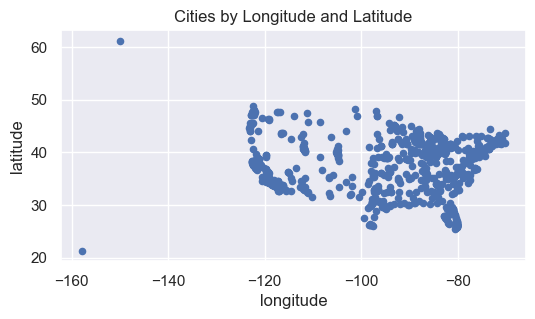

In [ ]:
title = 'Cities by Longitude and Latitude'
cities.plot.scatter(x='longitude', y='latitude', figsize=(6, 3), title=title);

## EXERCISE 43 ■ Cities (Beyond the exercise)

### 01 Beyond the exercise

In [ ]:
# Create a histogram of the growth rates among cities in both Texas and Michigan

In [ ]:
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


In [ ]:
growth_col = 'growth_from_2000_to_2013'

In [ ]:
# Check growth column for nan values or empty strings
cities[growth_col].isna().sum(), (cities[growth_col] == '').sum()

# Remove rows with NaN or empty growth values
cities_clean = cities[~cities[growth_col].isna() & (cities[growth_col] != '')].copy()
cities_clean.shape

(994, 7)

In [ ]:
# Convert growth column to numeric
cities_clean[growth_col] = (
    cities_clean[growth_col]
    .str.rstrip('%')  # Remove trailing '%'
    .astype(float) / 100
  )  # Convert to float and divide by 100

In [ ]:
cities_clean.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,0.048,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,0.048,34.052234,-118.243685,3884307,2,California
2,Chicago,-0.061,41.878114,-87.629798,2718782,3,Illinois
3,Houston,0.110,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,0.026,39.952584,-75.165222,1553165,5,Pennsylvania


In [ ]:
# Extract cities in Texas and Michigan and sort by state and growth
states_of_interest = ['Texas', 'Michigan']
cities_tm = cities_clean[cities_clean['state'].isin(states_of_interest)].copy()
cities_tm = cities_tm.sort_values(by=['state', growth_col])
cities_tm.shape

(114, 7)

In [ ]:
cities_tm.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
17,Detroit,-0.271,42.331427,-83.045754,688701,18,Michigan
296,Flint,-0.200,43.012527,-83.687456,99763,297,Michigan
735,Saginaw,-0.182,43.419470,-83.950807,50303,736,Michigan
593,Pontiac,-0.114,42.638922,-83.291047,59887,594,Michigan
989,Muskegon,-0.071,43.234181,-86.248392,37213,990,Michigan


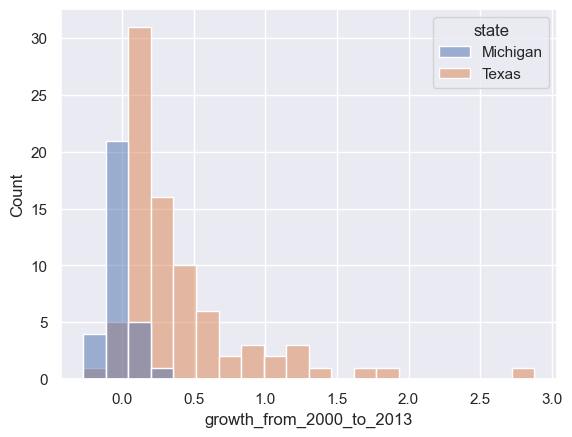

In [ ]:
sns.histplot(
    data=cities_tm,
    x='growth_from_2000_to_2013',
    hue='state',
    bins=20,
    alpha=0.5,  # Transparency for overlap

);

### 02 Beyond the exercise

In [ ]:
# Create a histogram of the growth rates among cities in both Texas and
# California.

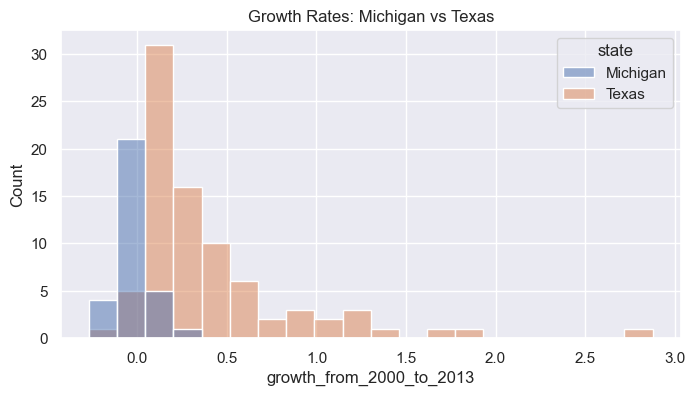

In [ ]:
# Use the class CityGrowth to compare the growth of cities in Texas and Michigan
# To check if the class works as expected
states = ['Michigan', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth()

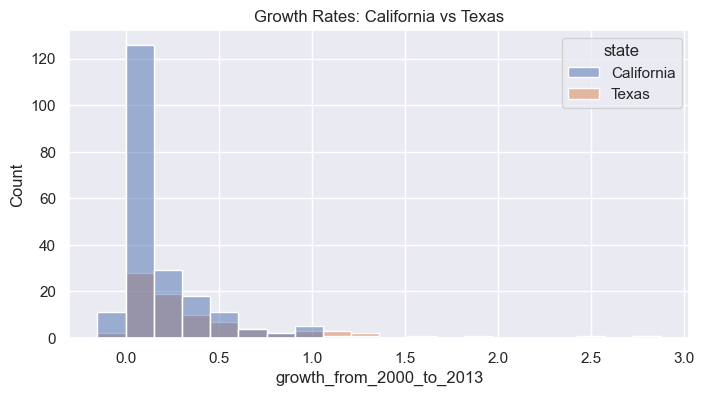

In [ ]:
# Use the class CityGrowth to compare the growth of cities in Texas and California
# To answer the current exercise question
states = ['California', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth()

Weighted average growth for Michigan: -0.0763
Weighted average growth for Texas: 0.2940


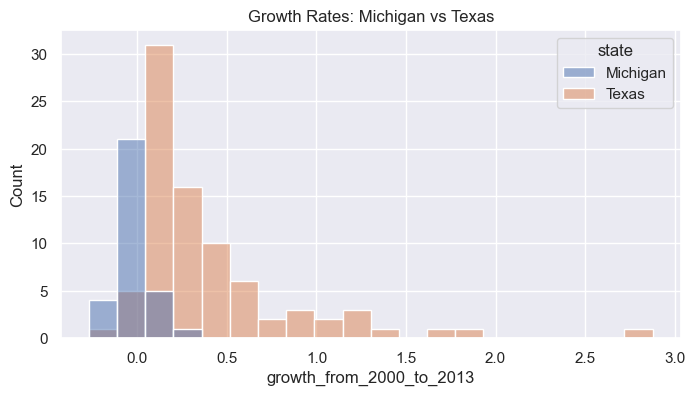

In [ ]:
# Use the class CityGrowth to compare the growth of cities in Texas and Michigan
# To check if the class works as expected
states = ['Michigan', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth(verbose=True)

Weighted average growth for California: 0.1637
Weighted average growth for Texas: 0.2940


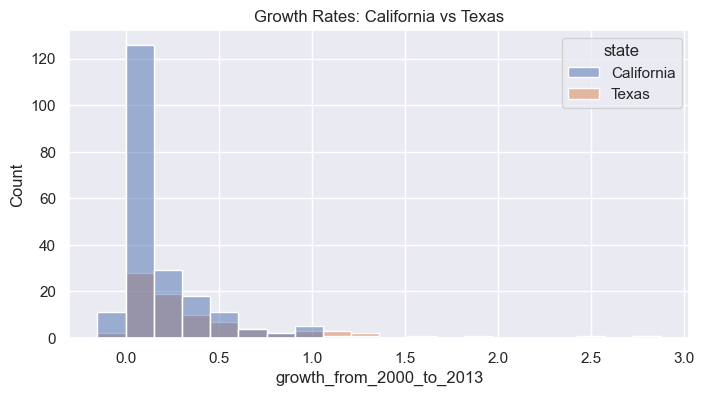

In [ ]:
# Use the class CityGrowth to compare the growth of cities in Texas and California
# To answer the current exercise question
states = ['California', 'Texas']
cg = utils.CityGrowth(data=cities, states=states)
cg.plot_growth(verbose=True)

### 03 Beyond the exercise

In [ ]:
# Create a bar plot from the average growth per state.

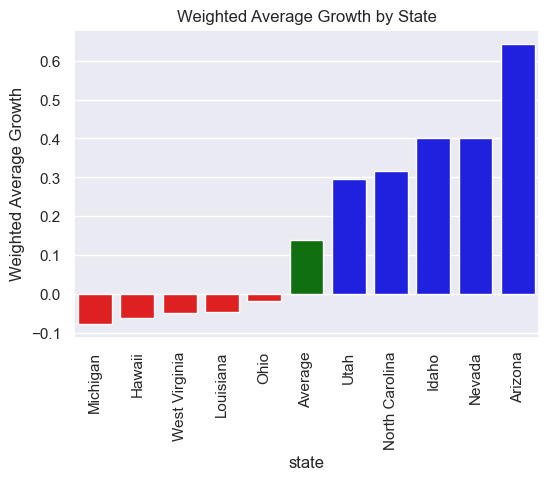

In [ ]:
# Create a bar plot from the average weighted growth per state
cg = utils.CityGrowth(data=cities)
cg.plot_weighted_avg_growth()

## EXERCISE 44 ■ Boxplotting weather

### 01 Load the weather data

In [ ]:
filename = "data/chicago,il.csv"
weather_raw = pd.read_csv(filename)
weather_raw.shape

(728, 25)

In [ ]:
weather_raw.columns

Index(['date_time', 'chicago,il_maxtempC', 'chicago,il_mintempC',
       'chicago,il_totalSnow_cm', 'chicago,il_sunHour', 'chicago,il_uvIndex',
       'chicago,il_uvIndex.1', 'chicago,il_moon_illumination',
       'chicago,il_moonrise', 'chicago,il_moonset', 'chicago,il_sunrise',
       'chicago,il_sunset', 'chicago,il_DewPointC', 'chicago,il_FeelsLikeC',
       'chicago,il_HeatIndexC', 'chicago,il_WindChillC',
       'chicago,il_WindGustKmph', 'chicago,il_cloudcover',
       'chicago,il_humidity', 'chicago,il_precipMM', 'chicago,il_pressure',
       'chicago,il_tempC', 'chicago,il_visibility', 'chicago,il_winddirDegree',
       'chicago,il_windspeedKmph'],
      dtype='object')

In [ ]:
weather_raw.iloc[:5, :5]  # Display first 5 rows and first 5 columns

,date_time,"chicago,il_maxtempC","chicago,il_mintempC","chicago,il_totalSnow_cm","chicago,il_sunHour"
0,2018-12-11 00:00:00,1,-2,0.0,8.7
1,2018-12-11 03:00:00,1,-2,0.0,8.7
2,2018-12-11 06:00:00,1,-2,0.0,8.7
3,2018-12-11 09:00:00,1,-2,0.0,8.7
4,2018-12-11 12:00:00,1,-2,0.0,8.7


In [ ]:
usecols = ['date_time', 'chicago,il_maxtempC', 'chicago,il_mintempC']
new_names = ['date_time', 'max_temp', 'min_temp']
weather = pd.read_csv(filename, 
                      usecols=usecols, 
                      parse_dates=['date_time'])

# Rename columns
weather.columns = new_names

In [ ]:
weather.head()

,date_time,max_temp,min_temp
0,2018-12-11 00:00:00,1,-2
1,2018-12-11 03:00:00,1,-2
2,2018-12-11 06:00:00,1,-2
3,2018-12-11 09:00:00,1,-2
4,2018-12-11 12:00:00,1,-2


In [ ]:
s = pd.Series([-20, 10, 15, 17, 20, 25, 40])

In [ ]:
s.describe()

count     7.000000
mean     15.285714
std      18.273061
min     -20.000000
25%      12.500000
50%      17.000000
75%      22.500000
max      40.000000
dtype: float64

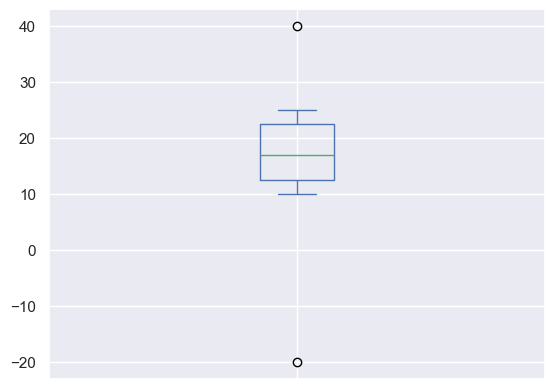

In [ ]:
s.plot.box();

In [ ]:
IQR = s.quantile(0.75) - s.quantile(0.25)
upper_whisker = s.quantile(0.75) + 1.5 * IQR
lower_whisker = s.quantile(0.25) - 1.5 * IQR
lower_whisker, upper_whisker

(np.float64(-2.5), np.float64(37.5))

In [ ]:
weather.shape

(728, 3)

### 02 Create a boxplot of Chicago’s minimum temperatures during this period 

In [ ]:
weather['min_temp'].describe()

count    728.000000
mean      -5.076923
std        6.255857
min      -28.000000
25%       -9.000000
50%       -4.000000
75%       -1.000000
max        6.000000
Name: min_temp, dtype: float64

In [ ]:
IQR = weather['min_temp'].quantile(0.75) - weather['min_temp'].quantile(0.25)
upper_whisker = weather['min_temp'].quantile(0.75) + 1.5 * IQR
lower_whisker = weather['min_temp'].quantile(0.25) - 1.5 * IQR
lower_whisker, upper_whisker

(np.float64(-21.0), np.float64(11.0))

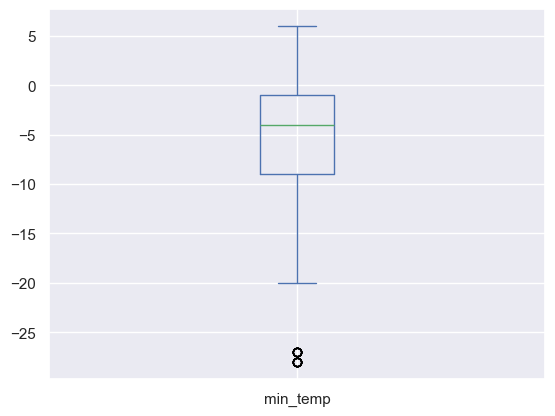

In [ ]:
# Create a boxplot of Chicago’s minimum temperatures during this period
weather['min_temp'].plot.box();

### 03 Find the values that are represented as dots on that boxplot

In [ ]:
weather['min_temp'].loc[weather['min_temp'] < lower_whisker]

400   -28
401   -28
402   -28
403   -28
404   -28
405   -28
406   -28
407   -28
408   -27
409   -27
410   -27
411   -27
412   -27
413   -27
414   -27
415   -27
Name: min_temp, dtype: int64

### 04 Create a boxplot of Chicago’s minimum temperatures in February

In [ ]:
weather.head()

,date_time,max_temp,min_temp
0,2018-12-11 00:00:00,1,-2
1,2018-12-11 03:00:00,1,-2
2,2018-12-11 06:00:00,1,-2
3,2018-12-11 09:00:00,1,-2
4,2018-12-11 12:00:00,1,-2


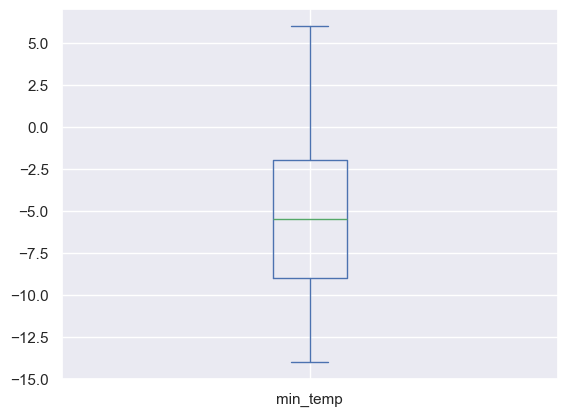

In [ ]:
mask_february = weather['date_time'].dt.month == 2
weather['min_temp'].loc[mask_february].plot.box();

In [ ]:
weather['min_temp'].loc[mask_february].describe()

count    224.000000
mean      -5.107143
std        5.112821
min      -14.000000
25%       -9.000000
50%       -5.500000
75%       -2.000000
max        6.000000
Name: min_temp, dtype: float64

### 05 Create a side-by-side boxplot of Chicago's minimum and temperatures in February and March

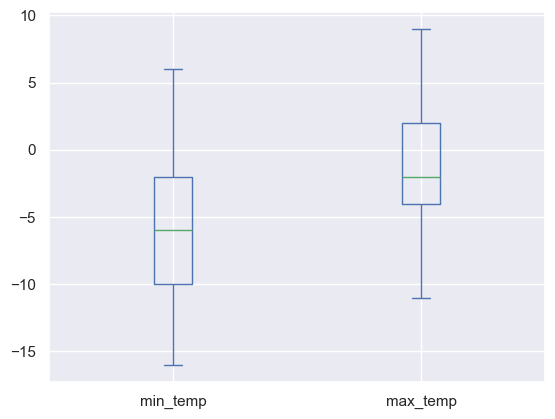

In [ ]:
mask_feb_march = weather['date_time'].dt.month.isin([2, 3])
weather[['min_temp', 'max_temp']].loc[mask_feb_march].plot.box();

### 06 Load additional weather data

In [ ]:
filename_los_angeles = "data/los+angeles,ca.csv"
filename_boston = "data/boston,ma.csv"

In [ ]:
usecols = [0, 1, 2]  # Columns to read: date_time, max_temp, min_temp
new_names = ['date_time', 'max_temp', 'min_temp']
weather_la = pd.read_csv(filename_los_angeles,
                          usecols=usecols,
                          header=0,
                          names=new_names,
                          parse_dates=['date_time'])
weather_boston = pd.read_csv(filename_boston,
                             usecols=usecols,
                             header=0,
                             names=new_names,
                             parse_dates=['date_time'])

In [ ]:
weather_la.shape, weather_boston.shape, weather.shape

((728, 3), (728, 3), (728, 3))

In [ ]:
# Concatenate the three DataFrames
weather_all = pd.concat([weather, weather_la, weather_boston],
                        keys=['Chicago', 'Los Angeles', 'Boston'],
                        names=['city', 'row'])

In [ ]:
weather_all.head()

date_time  max_temp  min_temp
city    row                                        
Chicago 0   2018-12-11 00:00:00         1        -2
        1   2018-12-11 03:00:00         1        -2
        2   2018-12-11 06:00:00         1        -2
        3   2018-12-11 09:00:00         1        -2
        4   2018-12-11 12:00:00         1        -2

### 07 Get descriptive statistics for mintemp and maxtemp grouped by city

In [ ]:
weather_all.groupby('city')['min_temp'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Boston,728.0,-3.142857,4.957195,-14.0,-6.0,-3.0,0.0,9.0
Chicago,728.0,-5.076923,6.255857,-28.0,-9.0,-4.0,-1.0,6.0
Los Angeles,728.0,10.637363,2.705200,4.0,9.0,11.0,12.0,17.0


In [ ]:
weather_all.groupby('city')['max_temp'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Boston,728.0,2.868132,4.945277,-12.0,0.0,2.0,6.0,17.0
Chicago,728.0,-0.736264,6.128985,-25.0,-3.0,0.0,3.0,9.0
Los Angeles,728.0,17.054945,2.708640,12.0,15.0,16.0,19.0,23.0


### 08 Create side-by-side boxplots showing minimum and maximum temperatures for each of the three cities

In [ ]:
weather_all.head()

date_time  max_temp  min_temp
city    row                                        
Chicago 0   2018-12-11 00:00:00         1        -2
        1   2018-12-11 03:00:00         1        -2
        2   2018-12-11 06:00:00         1        -2
        3   2018-12-11 09:00:00         1        -2
        4   2018-12-11 12:00:00         1        -2

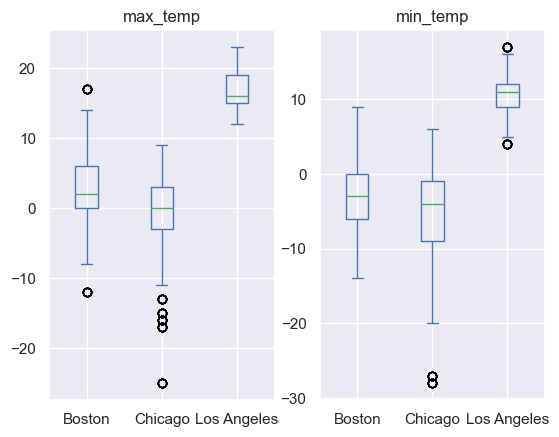

In [ ]:
weather_all_reset = weather_all.reset_index()
weather_all_reset.plot.box(column=['min_temp', 'max_temp'], by='city');

## EXERCISE 44 ■ Boxplotting weather (Beyond the exercise)

### 01 Beyond the exercise

In [ ]:
# Rather than starting with data from Chicago, begin with an empty data frame
# and use a for loop to load data from all three cities.

In [ ]:
wp = utils.WeatherPlotter()

In [ ]:
wp.chicago.head()

,date_time,max_temp,min_temp
0,2018-12-11 00:00:00,1,-2
1,2018-12-11 03:00:00,1,-2
2,2018-12-11 06:00:00,1,-2
3,2018-12-11 09:00:00,1,-2
4,2018-12-11 12:00:00,1,-2


In [ ]:
wp.combined.head()

,date_time,max_temp,min_temp,city
0,2018-12-11 00:00:00,1,-2,Chicago
1,2018-12-11 03:00:00,1,-2,Chicago
2,2018-12-11 06:00:00,1,-2,Chicago
3,2018-12-11 09:00:00,1,-2,Chicago
4,2018-12-11 12:00:00,1,-2,Chicago


### 02 Beyond the exercise

In [ ]:
# For each city, calculate the mean and median for mintemp and maxtemp. Are
# they the same (or even close)? If they’re different, in which direction are they
# pulled?

In [ ]:
wp = utils.WeatherPlotter()
averages = wp.get_averages()

In [ ]:
averages

city,Boston,Chicago,Los Angeles
min_temp_mean,-3.142857,-5.076923,10.637363
min_temp_median,-3.000000,-4.000000,11.000000
max_temp_mean,2.868132,-0.736264,17.054945
max_temp_median,2.000000,0.000000,16.000000


### 03 Beyond the exercise

In [ ]:
# Create a line plot showing the minimum temperatures in each city. The x axis
# should show dates, the y axis should show temperatures, and each line should
# represent a different city.

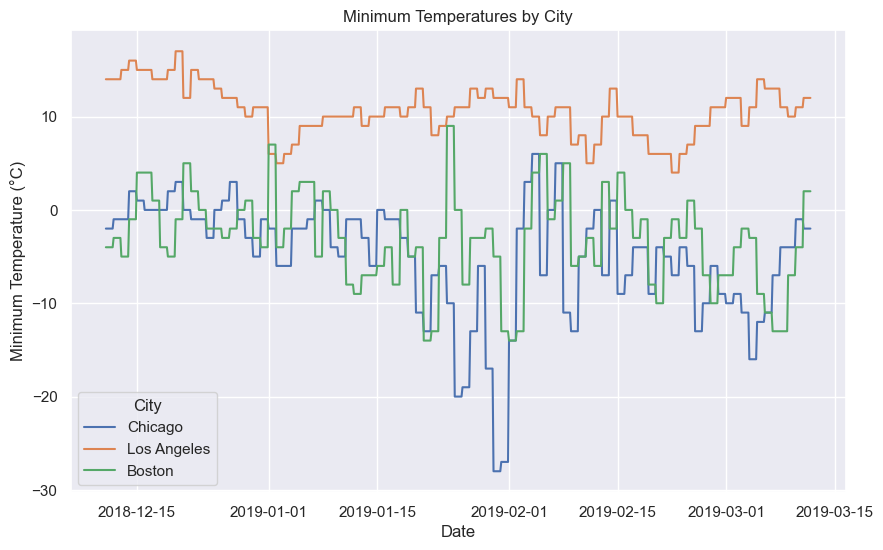

In [ ]:
wp = utils.WeatherPlotter()
wp.plot_min_temp()

## EXERCISE 45 ■ Taxi fare breakdown

### 01 Load the taxi data

In [ ]:
nyc = utils.NYCTaxiPlotter()

In [ ]:
nyc.taxi.shape

(21183631, 11)

In [ ]:
nyc.taxi.columns

Index(['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
nyc.taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.0,1.5,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,2019-01-01 00:59:47,1.0,2.6,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2018-12-21 13:48:30,3.0,0.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2018-11-28 15:52:25,5.0,0.0,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2018-11-28 15:56:57,5.0,0.0,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [ ]:
nyc.taxi[nyc.date_cols[0]].dt.month.value_counts().sort_index()

tpep_pickup_datetime
1    14072053
7     7110548
Name: count, dtype: int64

In [ ]:
nyc.taxi[nyc.date_col].dt.year.value_counts()

tpep_pickup_datetime
2019    13977395
2020     7205206
Name: count, dtype: int64

### 02 Compare rides per year and month

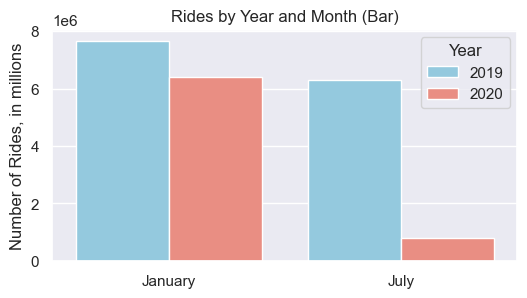

In [ ]:
nyc.plot_rides_bar()

### 03 Compare the total amount paid per year and month

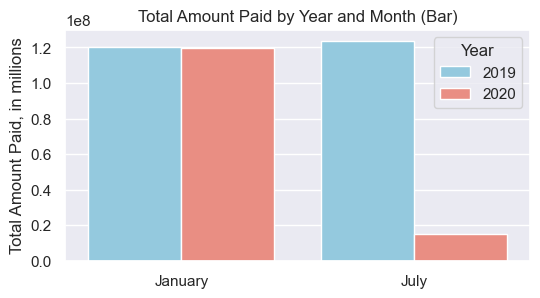

In [ ]:
nyc.plot_amount_paid_bar()

In [ ]:
df = nyc.taxi.copy()
df['year'] = df[nyc.date_cols[0]].dt.year
df['month'] = df[nyc.date_cols[0]].dt.month.map({1: 'January', 7: 'July'})

#### DEBUGGING

In [ ]:
grouped = df.groupby(['year', 'month'])

In [ ]:
grouped

In [ ]:
type(grouped.groups), len(grouped.groups), grouped.groups.keys()

(pandas.io.formats.printing.PrettyDict,
 4,
 dict_keys([(2019, 'January'), (2019, 'July'), (2020, 'January'), (2020, 'July')]))

In [ ]:
key = (2019, 'January')
grouped.groups[key][:5], len(grouped.groups[key])

(Index([0, 1, 7, 8, 9], dtype='int64'), 7667255)

In [ ]:
grouped.size()

year  month  
2019  January    7667255
      July       6310140
2020  January    6404798
      July        800408
dtype: int64

In [ ]:
grouped.get_group(key).head()  # DataFrame for year 2019, month 1

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month
0,2019-01-01 00:46:40,1.0,1.5,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,2019,January
1,2019-01-01 00:59:47,1.0,2.6,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,2019,January
7,2019-01-01 00:21:28,1.0,1.3,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,2019,January
8,2019-01-01 00:32:01,1.0,3.7,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,2019,January
9,2019-01-01 00:57:32,2.0,2.1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,2019,January


### 04 Stacked bar plot of fare components

            fare_amount     extra   mta_tax  tip_amount  tolls_amount
year month                                                           
2019 Jan      95.144794  2.515128  3.809447   14.011047      2.429905
     Jul      85.880298  7.344664  3.115133   13.780381      2.559035
2020 Jan      81.302793  7.144415  3.153201   14.022343      2.234256
     Jul      10.756158  0.803380  0.393900    1.432059      0.253630


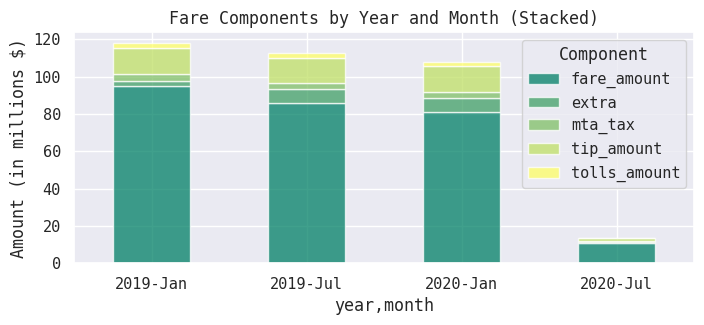

In [ ]:
nyc.plot_fare_components_stacked()

#### DEBUGGING

In [ ]:
df = nyc.taxi.copy()
df['year'] = df[nyc.date_cols[0]].dt.year
df['month'] = df[nyc.date_cols[0]].dt.month

fair_components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']
components = df.groupby(['year', 'month'])[fair_components].sum().reset_index()
components[fair_components] /= 1e6  # Scale down for better readability

components

,year,month,fare_amount,extra,mta_tax,tip_amount,tolls_amount
0,2019,1,95.144794,2.515128,3.809447,14.011047,2.429905
1,2019,7,85.880298,7.344664,3.115133,13.780381,2.559035
2,2020,1,81.302793,7.144415,3.153201,14.022343,2.234256
3,2020,7,10.756158,0.803380,0.393900,1.432059,0.253630


### 05 Fare amount per passenger count

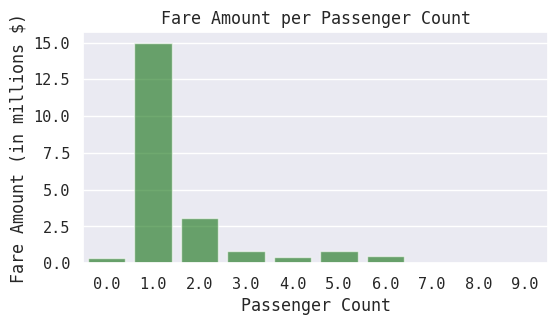

In [ ]:
nyc.plot_fare_per_passenger()

#### DEBBUGGING

In [ ]:
df = nyc.taxi.copy()
df['fare_per_passenger'] = df['fare_amount'] / df['passenger_count']
fare_per_passenger = df['passenger_count'].value_counts().sort_index() / 1e6  # Scale down for better readability
fare_per_passenger

passenger_count
0.0     0.368073
1.0    14.949567
2.0     3.105017
3.0     0.865880
4.0     0.411724
5.0     0.820826
6.0     0.499070
7.0     0.000082
8.0     0.000070
9.0     0.000045
Name: count, dtype: float64

In [ ]:
type(fare_per_passenger), fare_per_passenger.index, fare_per_passenger.values

(pandas.core.series.Series,
 Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64', name='passenger_count'),
 array([3.6807300e-01, 1.4949567e+01, 3.1050170e+00, 8.6588000e-01,
        4.1172400e-01, 8.2082600e-01, 4.9907000e-01, 8.2000000e-05,
        7.0000000e-05, 4.5000000e-05]))

### 06 Frequency of tipping percentages

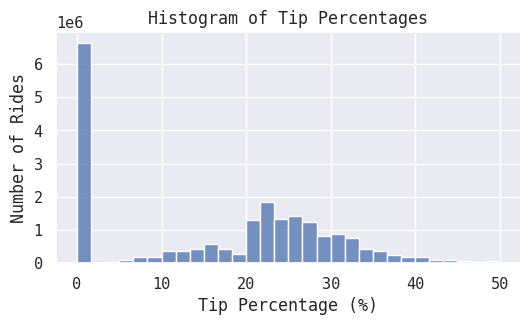

In [ ]:
nyc.plot_tip_percentage_hist()

#### DEBUGGING

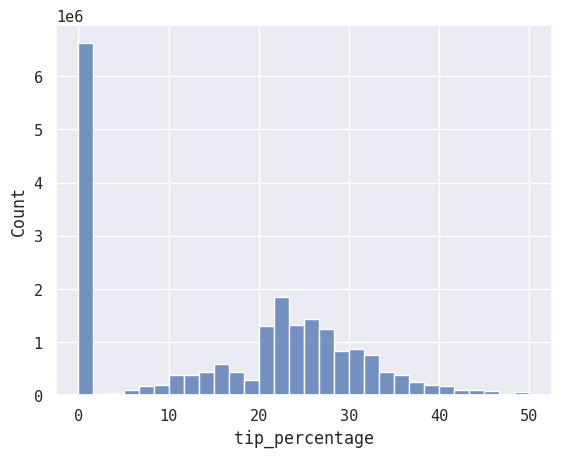

In [ ]:
df = nyc.taxi.copy()
df = df[df['fare_amount'] > 0].copy()
df = df.dropna(subset=['fare_amount', 'tip_amount'])

df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
sns.histplot(df['tip_percentage'], bins=30, binrange=(0, 50));

## EXERCISE 45 ■ Taxi fare breakdown (Beyond the exercise)

### 01 Beyond the exercise

In [ ]:
# Create a bar plot, showing the average distance traveled per day of the week in July 2020. 
# The x axis should show the name of each day.

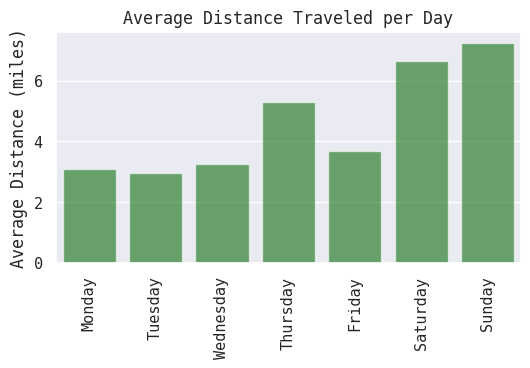

In [ ]:
nyc.plot_average_distance_per_day()

#### DEBBUGGING

In [ ]:
# Filter data for the specified month and year
month, year = 7, 2020
df = nyc.taxi.copy()
mask = (df[nyc.date_col].dt.year == year) & (df[nyc.date_col].dt.month == month)
df = df[mask].copy()

# Compute average distance per day of the week
df['day_of_week'] = df[nyc.date_col].dt.day_name()
avg_distance = df.groupby('day_of_week')['trip_distance'].mean()

In [ ]:
avg_distance

day_of_week
Friday       3.687335
Monday       3.087188
Saturday     6.632913
Sunday       7.252421
Thursday     5.285697
Tuesday      2.943547
Wednesday    3.255389
Name: trip_distance, dtype: float64

In [ ]:
nyc.taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.0,1.5,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,2019-01-01 00:59:47,1.0,2.6,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
7,2019-01-01 00:21:28,1.0,1.3,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN
8,2019-01-01 00:32:01,1.0,3.7,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN
9,2019-01-01 00:57:32,2.0,2.1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN


In [ ]:
# Maps day numbers to names and vice versa
month, year = 7, 2020
numday_to_name = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                    4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
name_to_numday = {v: k for k, v in numday_to_name.items()}

# Filter data for the specified month and year
df = nyc.taxi.copy()
mask = (df[nyc.date_col].dt.year == year) & (df[nyc.date_col].dt.month == month)
df = df[mask].copy()

# Compute average distance per day of the week
df['day_of_week'] = df[nyc.date_col].dt.day_name().map(name_to_numday)
avg_distance = df.groupby('day_of_week')['trip_distance'].mean().sort_index()
avg_distance.index = avg_distance.index.map(numday_to_name)

avg_distance, type(avg_distance)

(day_of_week
 Monday       3.087188
 Tuesday      2.943547
 Wednesday    3.255389
 Thursday     5.285697
 Friday       3.687335
 Saturday     6.632913
 Sunday       7.252421
 Name: trip_distance, dtype: float64,
 pandas.core.series.Series)

### 02 Beyond the exercise

In [ ]:
# Create a scatter plot with the taxi data from July 2020, comparing trip_
# distance with total_amount. Ignore all rides in which either value was less
# than or equal to 0 or greater than 500.

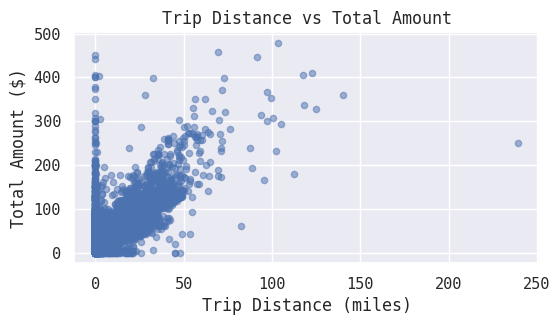

In [ ]:
nyc.plot_scatter()

#### DEBBUGGING

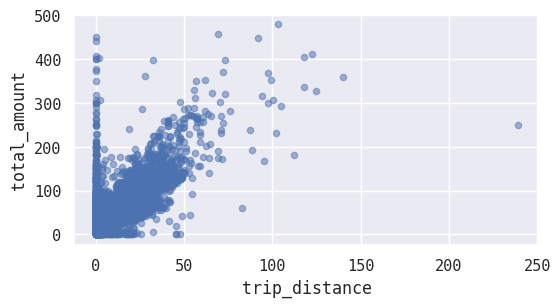

In [ ]:
# Given parameters
month, year = 7, 2020
dist_col, amount_col = 'trip_distance', 'total_amount'
columns_of_interest = [dist_col, amount_col]
low, high = 0, 500

# Copy the data
df = nyc.taxi.copy()

# Filter out rows for the given month and year
mask_date = (df[nyc.date_col].dt.year == year) & (df[nyc.date_col].dt.month == month)
df = df[mask_date][columns_of_interest]

# Filter out rows within the given range
mask_range = (df[dist_col].between(low, high)) & (df[amount_col].between(low, high))
df = df[mask_range]

# Create the scatter plot
df.plot.scatter(x=dist_col, y=amount_col, figsize=(6, 3), alpha=0.5);

### 03 Beyond the exercise

In [ ]:
# Create a scatter plot with the taxi data from July 2020, comparing trip_
# distance with passenger_count. Ignore all rides in which trip_distance was
# less than or equal to 0 or greater than 500.

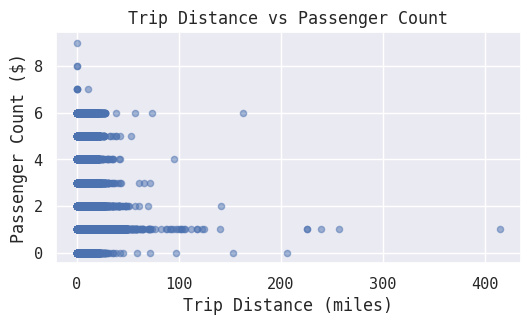

In [ ]:
columns_of_interest = ['trip_distance', 'passenger_count']
nyc.plot_scatter(cols_of_interest=columns_of_interest)

## EXERCISE 46 ■ Cars, oil, and ice cream

### 01 Load the data

In [ ]:
cf = utils.CorrFinder()

In [ ]:
cf.combined.head()

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382,150277.0
1986-05-01,13.80,2.368,160459.0
1986-07-01,12.39,2.369,171114.0
1986-08-01,11.56,2.319,173977.0
1986-10-01,15.23,2.377,159434.0


In [ ]:
cf.combined.shape

(275, 3)

### 02 Correlation matrix

In [ ]:
cf.correlation_matrix()

,oil,icecream,miles
oil,1.0000,0.7773,0.6453
icecream,0.7773,1.0000,0.8184
miles,0.6453,0.8184,1.0000


### 03 Scatter plots

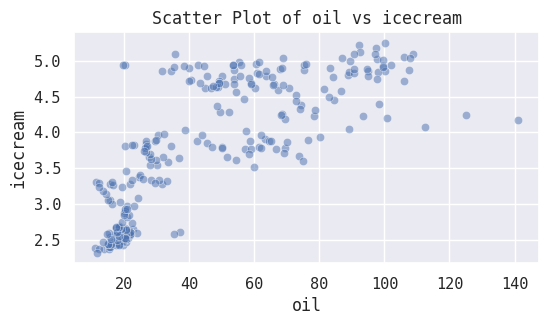

In [ ]:
x_col, y_col = 'oil', 'icecream'
cf.plot_scatter(x_col, y_col)

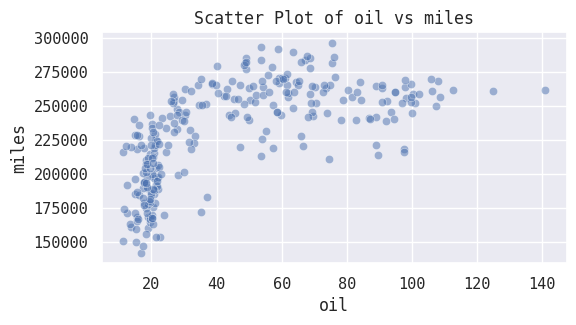

In [ ]:
x_col, y_col = 'oil', 'miles'
cf.plot_scatter(x_col, y_col)

### 04 Scatter matrix

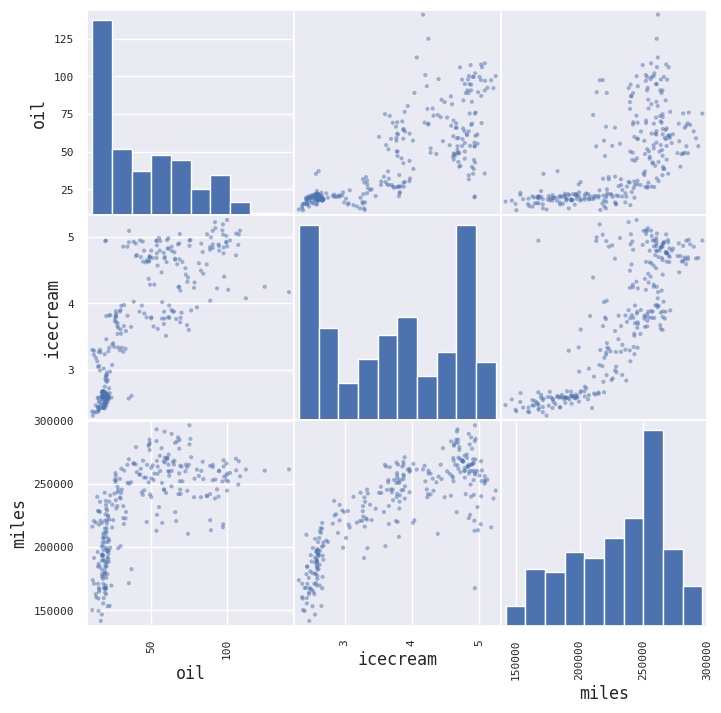

In [ ]:
pd.plotting.scatter_matrix(cf.combined, figsize=(8, 8), alpha=0.5);

## EXERCISE 46 ■ Cars, oil, and ice cream (Beyond the exercise)

### 01 Beyond the exercise

In [ ]:
cf = utils.CorrFinder()

In [ ]:
cf.correlation_with_months()

,oil,icecream,miles,month
oil,1.0000,0.7773,0.6453,0.0066
icecream,0.7773,1.0000,0.8184,-0.0040
miles,0.6453,0.8184,1.0000,0.0793
month,0.0066,-0.0040,0.0793,1.0000


### 02 Beyond the exercise

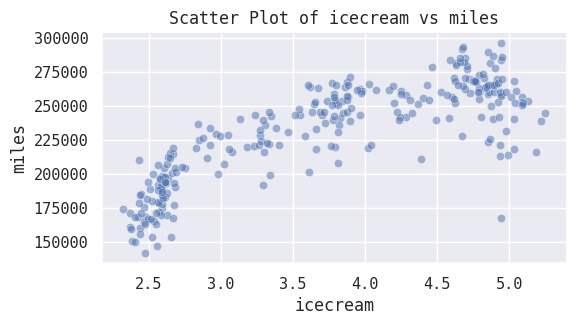

In [ ]:
columns_of_interest= ['icecream', 'miles']
x_col, y_col = columns_of_interest
cf.plot_scatter(x_col, y_col)

### 03 Beyond the exercise

In [ ]:
cf.oil.index.year.unique()

Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int32', name='date')

In [ ]:
cf.ice_cream.index.year.unique()

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int32', name='date')

## EXERCISE 47 ■ Seaborn taxi plots

### Introduction to seaborn

In [ ]:
wp = utils.WeatherPlotter()

In [ ]:
wp.chicago.head()

,date_time,max_temp,min_temp
0,2018-12-11 00:00:00,1,-2
1,2018-12-11 03:00:00,1,-2
2,2018-12-11 06:00:00,1,-2
3,2018-12-11 09:00:00,1,-2
4,2018-12-11 12:00:00,1,-2


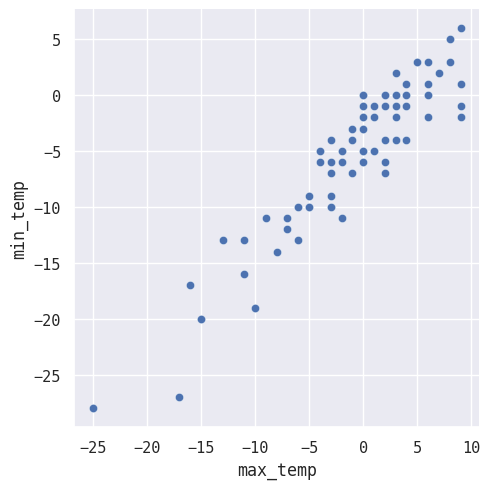

In [ ]:
# Plot relplot of Chicago min and max temperatures
sns.relplot(data=wp.chicago, x='max_temp', y='min_temp', alpha=0.5);

In [ ]:
wp.combined.head()

,date_time,max_temp,min_temp,city
0,2018-12-11 00:00:00,1,-2,Chicago
1,2018-12-11 03:00:00,1,-2,Chicago
2,2018-12-11 06:00:00,1,-2,Chicago
3,2018-12-11 09:00:00,1,-2,Chicago
4,2018-12-11 12:00:00,1,-2,Chicago


In [ ]:
wp.combined['city'].unique()

array(['Chicago', 'Los Angeles', 'Boston'], dtype=object)

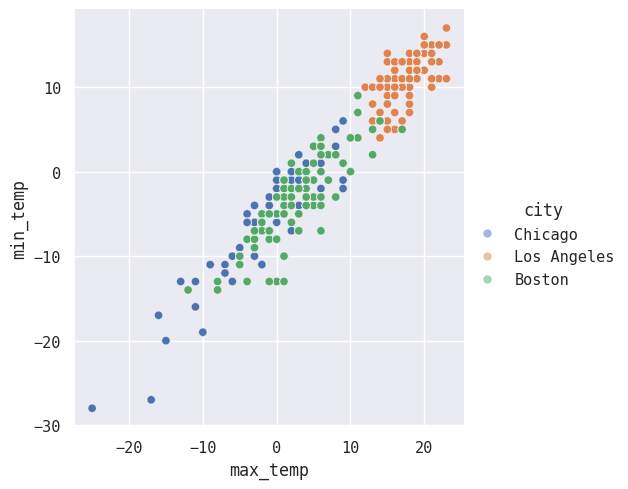

In [ ]:
# Plot relplot of min and max temperatures for all cities
sns.relplot(data=wp.combined, x='max_temp', y='min_temp', hue='city', alpha=0.5);


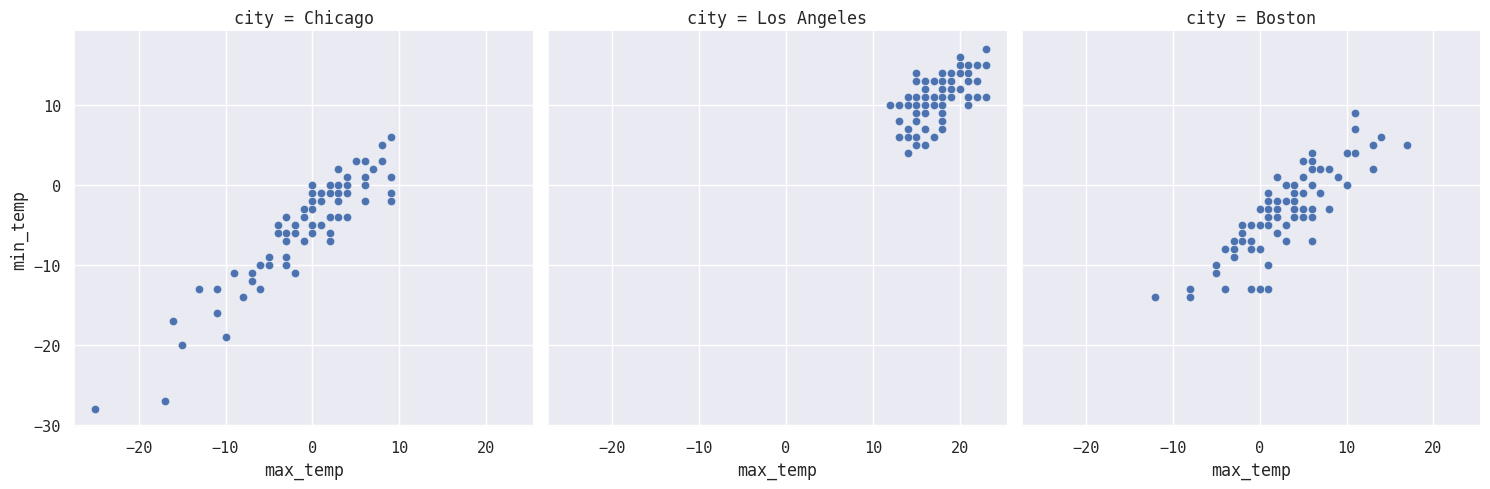

In [ ]:
# Plot relplot of min and max temperatures for all cities
sns.relplot(data=wp.combined, x='max_temp', y='min_temp', col='city', alpha=0.5);

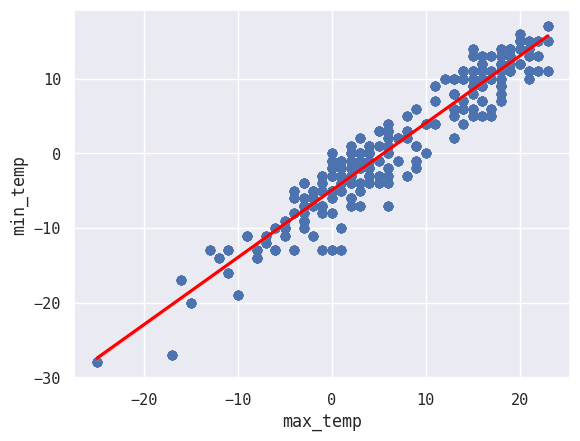

In [ ]:
# Plot relplot of min and max temperatures for all cities
sns.regplot(data=wp.combined, x='max_temp', y='min_temp', line_kws={"color": "red"});

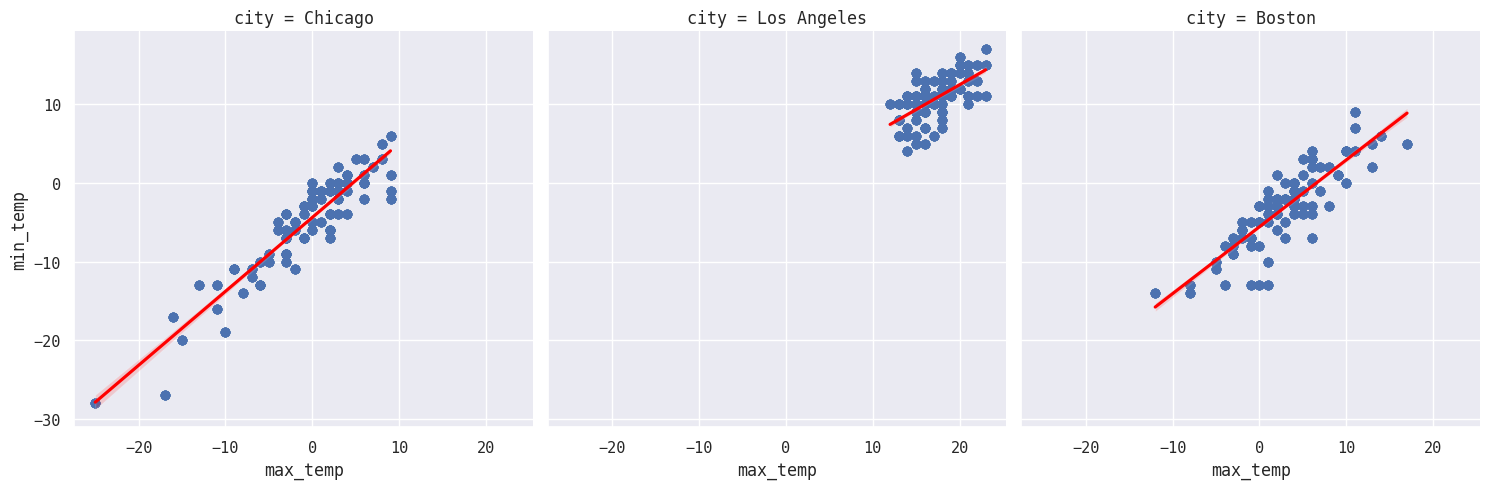

In [ ]:
sns.lmplot(data=wp.combined, x='max_temp', y='min_temp', col='city', line_kws={"color": "red"});

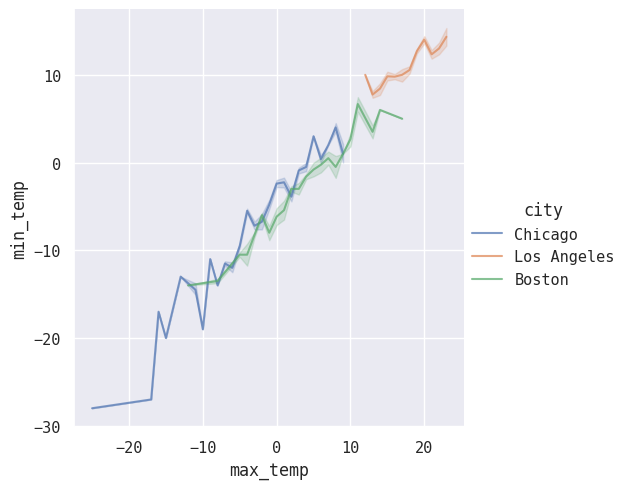

In [ ]:
# Plot relplot of min and max temperatures for all cities
sns.relplot(data=wp.combined, x='max_temp', y='min_temp', hue='city', kind='line', alpha=0.7);

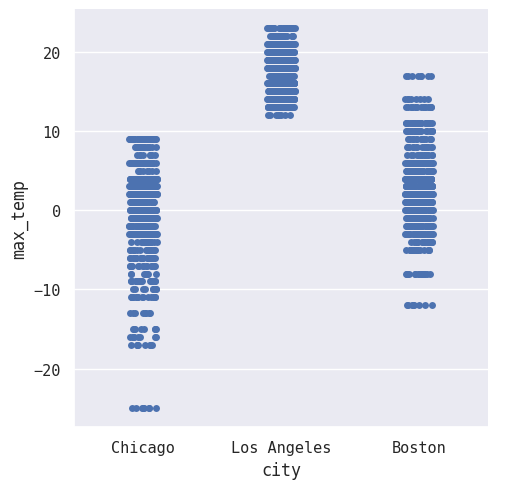

In [ ]:
# Pllot catplot of max temperatures for all cities
sns.catplot(x='city', y='max_temp', data=wp.combined);

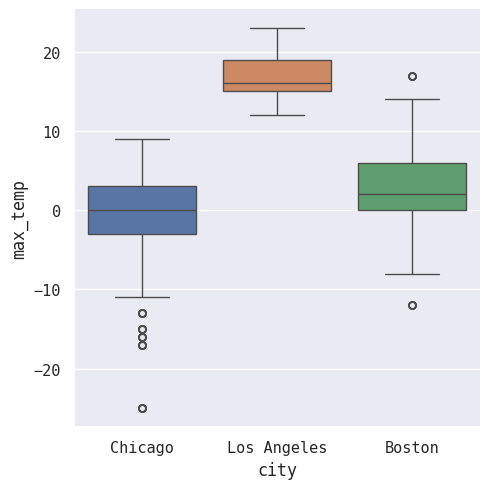

In [ ]:
# Summarize the max temperatures for all cities using catplot
sns.catplot(x='city', y='max_temp', kind='box', data=wp.combined, hue='city');

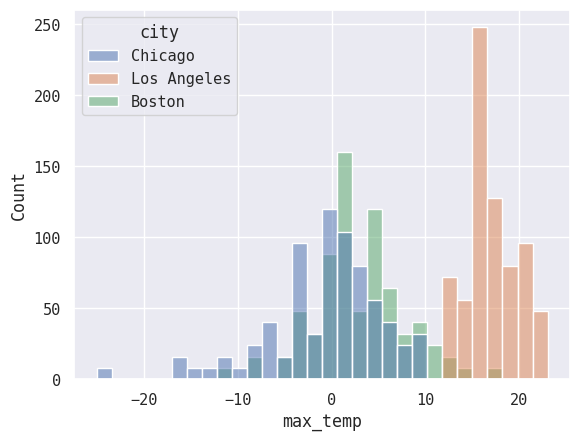

In [ ]:
# Plot a histogram of max temperatures for all cities
sns.histplot(data=wp.combined, x='max_temp', hue='city', bins=30);

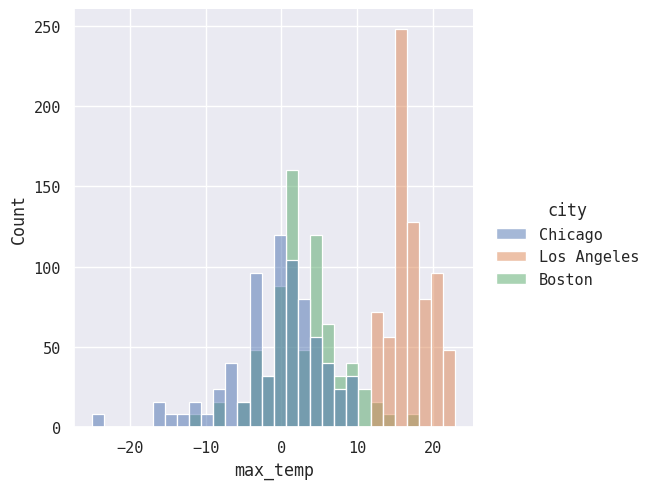

In [ ]:
# Plot a histogram of max temperatures for all cities using displot
sns.displot(data=wp.combined, x='max_temp', hue='city', bins=30);

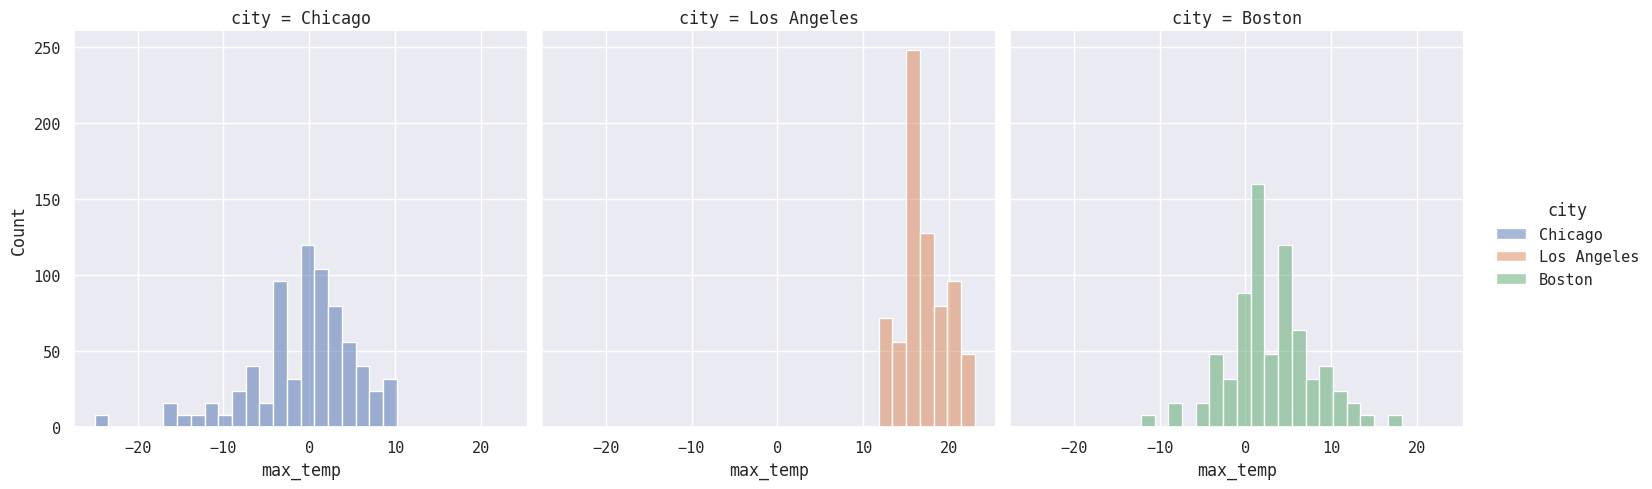

In [ ]:
# Plot a histogram of max temperatures for all cities using different plots
sns.displot(data=wp.combined, x='max_temp', col='city', hue='city', bins=30);

### 01 Load the data

In [ ]:
nycs = utils.NYCTaxiPlotterSeaborn()

In [ ]:
nycs.taxi.shape, nycs.taxi_toy.shape

((7205204, 7), (72052, 7))

In [ ]:
nycs.taxi_toy.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day
0,2020-07-18 13:44:00,NaN,11.73,49.20,2020,7,18
1,2020-01-16 19:05:14,3.0,0.78,12.25,2020,1,16
2,2020-01-20 15:57:03,1.0,0.91,12.09,2020,1,20
3,2020-01-03 16:44:46,1.0,22.31,65.92,2020,1,3
4,2020-01-02 13:19:53,1.0,2.03,17.16,2020,1,2


### 02 Scatter plot in `seaborn`

In [ ]:
# Using Seaborn, create a scatter plot in which the x axis shows trip_distance
# and the y axis shows total_amount, with the plot colors set by passenger_
# count. Use the 1% sample of the data.

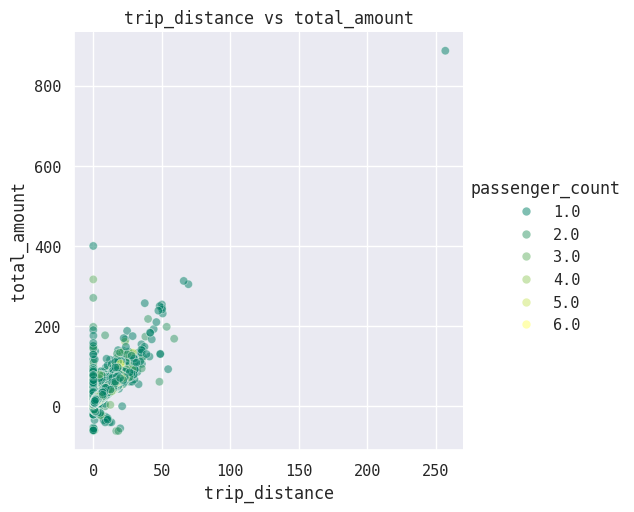

In [ ]:
nycs = utils.NYCTaxiPlotterSeaborn()
nycs.plot_relplot_scatter('trip_distance', 'total_amount', toy=True)

In [ ]:
nycs.taxi_toy.passenger_count.value_counts().sort_index()

passenger_count
1.0    51102
2.0    10504
3.0     2691
4.0     1309
5.0     2365
6.0     1459
Name: count, dtype: int64

### 03 Line plot in `seaborn`

In [ ]:
# Create a line plot showing the distance traveled on each day of January and July.
# The x axis should be the day of the month, and the y axis is the average trip dis-
# tance. There should be two lines, one for each month.

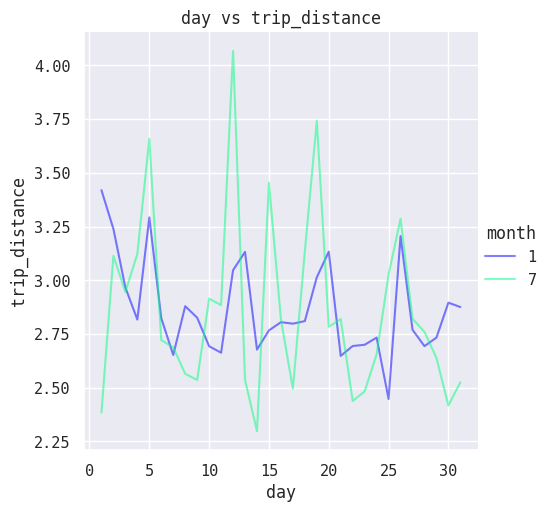

In [ ]:
nycs.plot_relplot_line('day', 'trip_distance', hue='month', toy=True)

In [ ]:
# Using Seaborn, show the number of trips taken on each day (1–31) of both
# months (January and July). The x axis should refer to the day of the month, and
# the y axis should show the number of trips taken.

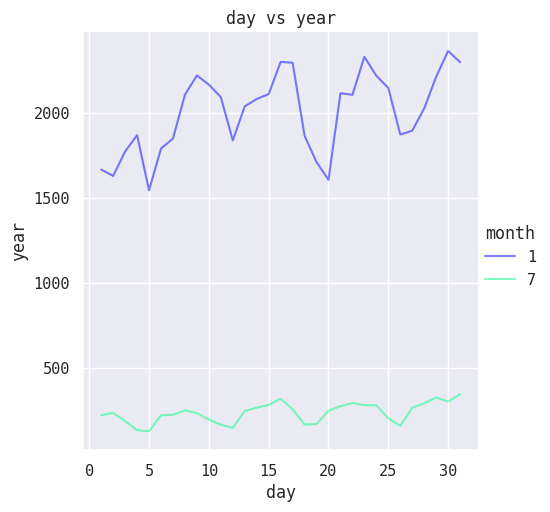

In [ ]:
nycs = utils.NYCTaxiPlotterSeaborn()
df = nycs.taxi_toy.copy()
df = df.groupby(['month', 'day'])[['year']].count().reset_index()
nycs.plot_relplot_line('day', 'year', hue='month', toy=True, data=df)

In [ ]:
df.head()

,month,day,year
0,1,1,1667
1,1,2,1630
2,1,3,1774
3,1,4,1870
4,1,5,1545


### 04 Box plot in `seaborn`

In [ ]:
# Using Seaborn, create a boxplot of total_amount with one plot for each
# month.

In [ ]:
nycs.taxi_toy.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day
0,2020-07-27 08:03:32,1.0,2.70,14.30,2020,7,27
1,2020-01-03 19:30:13,2.0,2.03,16.62,2020,1,3
2,2020-01-23 21:30:53,1.0,3.70,19.30,2020,1,23
3,2020-01-03 23:34:05,1.0,2.51,19.24,2020,1,3
4,2020-01-12 02:06:52,2.0,6.35,32.16,2020,1,12


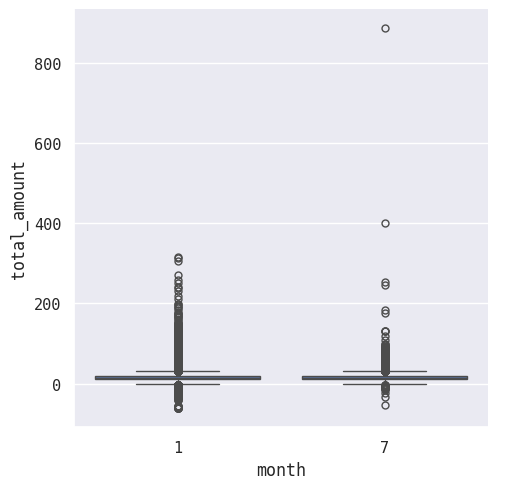

In [ ]:
sns.catplot(x='month', y='total_amount', kind='box', data=nycs.taxi_toy)

## EXERCISE 47 ■ Seaborn taxi plots (Beyond the exercise)

### 01 Beyond the exercise

In [ ]:
# Load NYC taxi data from both 2019 and 2020, January and July. Remove data
# from outside of those years and months. Now display the number of trips on
# each day of the month in four separate graphs: the top row in 2019 and the bot-
# tom row in 2020, the left column for January and the right column for July.

In [ ]:
nycs = utils.NYCTaxiPlotterSeaborn(both_years=True)

In [ ]:
nycs.taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day
0,2019-01-01 00:46:40,1.0,1.5,9.95,2019,1,1
1,2019-01-01 00:59:47,1.0,2.6,16.30,2019,1,1
2,2019-01-01 00:21:28,1.0,1.3,9.05,2019,1,1
3,2019-01-01 00:32:01,1.0,3.7,18.50,2019,1,1
4,2019-01-01 00:57:32,2.0,2.1,13.00,2019,1,1


In [ ]:
nycs.taxi['year'].unique(), nycs.taxi['month'].unique()

(array([2019, 2020], dtype=int32), array([1, 7], dtype=int32))

In [ ]:
df = nycs.taxi_toy.copy()
data=df.groupby(['year','month', 'day'])[['total_amount']].count().reset_index()
data.head()

,year,month,day,total_amount
0,2019,1,1,1854
1,2019,1,2,1983
2,2019,1,3,2252
3,2019,1,4,2332
4,2019,1,5,2406


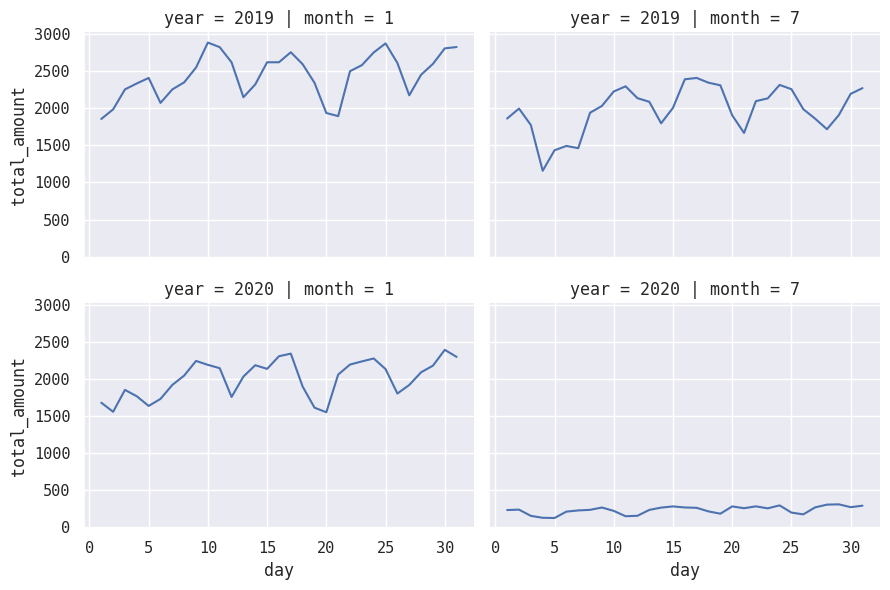

In [ ]:
sns.relplot(data=data, x='day', y='total_amount', 
            col='month', row='year', 
            kind='line', height=3, aspect=1.5);

### 02 Beyond the exercise

In [ ]:
# Add a trip_length column for short, medium, and long trips, as we did in
# exercise 7. Show the trip distance per day of month in three plots alongside one
# another, with one for each category.
# - Short, 2 miles
# - Medium, > 2 miles but 10 miles
# - Long, > 10 miles

In [ ]:
nycs = utils.NYCTaxiPlotterSeaborn(both_years=True, trip_length=True)

In [ ]:
df = nycs.taxi_toy.copy()
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day,trip_length
0,2019-01-27 21:07:25,1.0,0.50,6.95,2019,1,27,Short
1,2019-07-14 17:28:46,1.0,1.42,12.36,2019,7,14,Short
2,2019-01-11 17:56:16,2.0,1.77,13.30,2019,1,11,Short
3,2020-01-17 08:18:42,1.0,1.70,12.95,2020,1,17,Short
4,2019-01-19 21:18:22,2.0,1.45,11.44,2019,1,19,Short


In [ ]:
df['trip_length'].value_counts()

trip_length
Short     126057
Medium     68718
Long       11746
Name: count, dtype: int64

In [ ]:
data = df.groupby(['trip_length','day'])[['trip_distance']].count().reset_index()
data.head()

,trip_length,day,trip_distance
0,Long,1,416
1,Long,2,401
2,Long,3,347
3,Long,4,322
4,Long,5,335


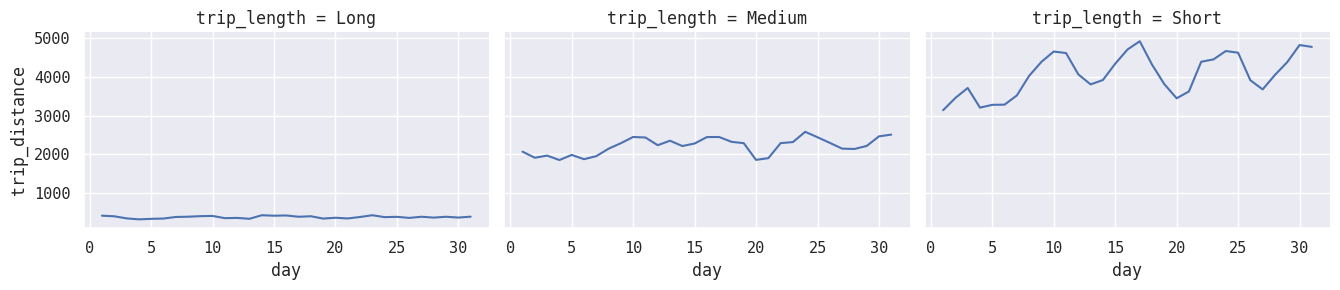

In [ ]:
sns.relplot(data=data, x='day', y='trip_distance',
            col='trip_length',
            kind='line', height=3, aspect=1.5);

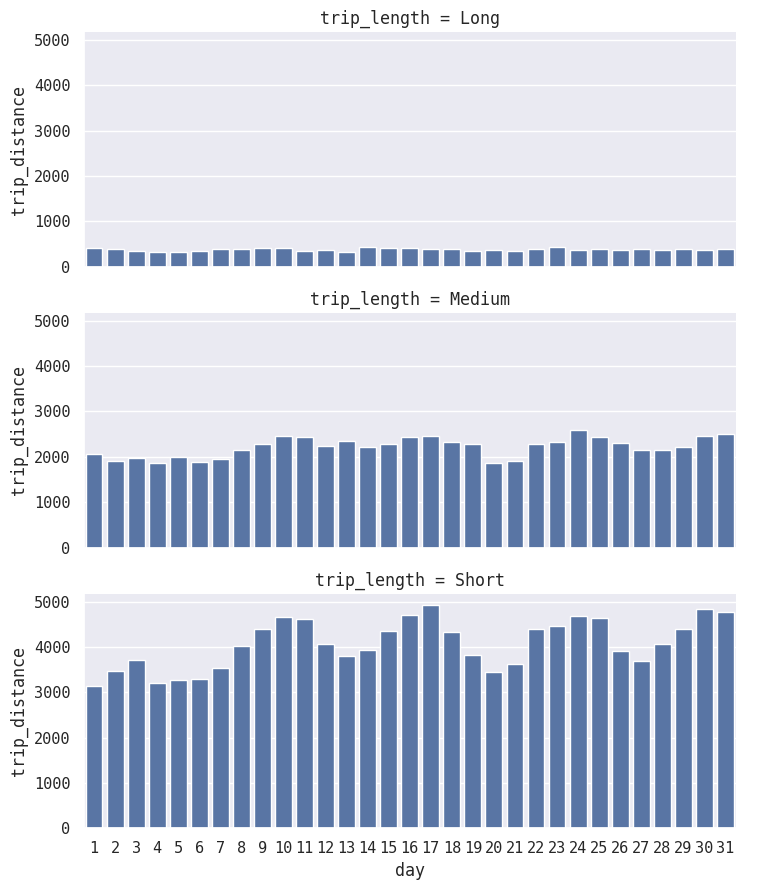

In [ ]:
sns.catplot(data=data, x='day', y='trip_distance',
            row='trip_length',
            kind='bar', height=3, aspect=2.5);

### 03 Beyond the exercise

In [ ]:
# Create a bar plot showing how many rides take place in each hour (0–24) in
# each month (January and July). Each month should appear in a different color,
# and they should appear side by side with January on the left and July on the
# right.

In [ ]:
df = nycs.taxi_toy.copy()

In [ ]:
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day,trip_length
0,2019-01-27 21:07:25,1.0,0.50,6.95,2019,1,27,Short
1,2019-07-14 17:28:46,1.0,1.42,12.36,2019,7,14,Short
2,2019-01-11 17:56:16,2.0,1.77,13.30,2019,1,11,Short
3,2020-01-17 08:18:42,1.0,1.70,12.95,2020,1,17,Short
4,2019-01-19 21:18:22,2.0,1.45,11.44,2019,1,19,Short


In [ ]:
df['hour'] = df[nycs.date_col].dt.hour
df['month'] = df[nycs.date_col].dt.month.map({1: 'January', 7: 'July'})
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,year,month,day,trip_length,hour
0,2019-01-27 21:07:25,1.0,0.50,6.95,2019,January,27,Short,21
1,2019-07-14 17:28:46,1.0,1.42,12.36,2019,July,14,Short,17
2,2019-01-11 17:56:16,2.0,1.77,13.30,2019,January,11,Short,17
3,2020-01-17 08:18:42,1.0,1.70,12.95,2020,January,17,Short,8
4,2019-01-19 21:18:22,2.0,1.45,11.44,2019,January,19,Short,21


In [ ]:
data = df.groupby(['month', 'hour'])[['total_amount']].count().reset_index()
data.head()

,month,hour,total_amount
0,January,0,3662
1,January,1,2629
2,January,2,1859
3,January,3,1405
4,January,4,1048


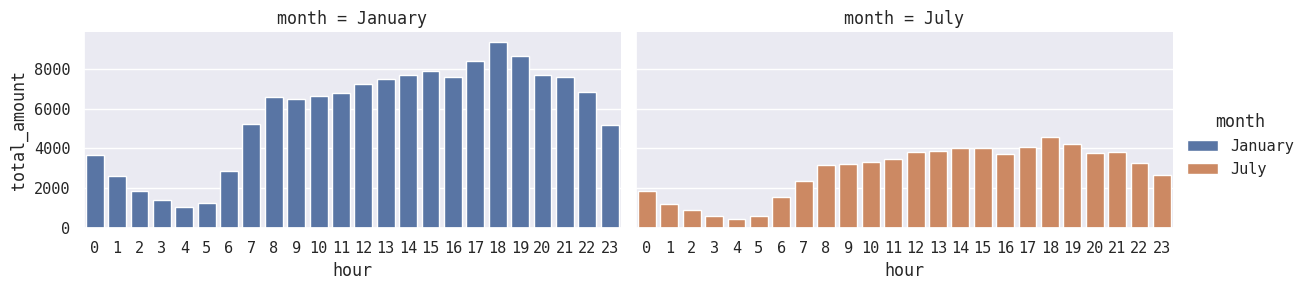

In [ ]:
sns.catplot(data=data, x='hour', y='total_amount',
            col='month', hue='month',
            kind='bar', height=3, aspect=2.0);